In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("coffee_ultimate.csv")

df.head()

,URL,Rating,Roaster,Coffee Name,Roaster Location,Coffee Origin,Aroma,Acidity,Acidity/Structure,Body,...,Bottom Line,Agtron_whole,Agtron_ground,Roaster Latitude,Roaster Longitude,usd_per_100g_adj,coffee_origin_adj,roast_lv_adj,coffee_name_hundredpercent,review_date_adj
0,https://www.coffeereview.com/review/100-arabic...,89.0,Caffe Bomrad,100% Arabica 100% Italiano,"Torino, Italy",Not disclosed.,8.0,NaN,NaN,8.0,...,NaN,48.0,65.0,45.070315,7.686855,7.548955,NaN,3.0,True,2011-11-01
1,https://www.coffeereview.com/review/100-arabic...,87.0,Lucaff?,"100% Arabica, Black Label (ESE pod)","Padenghe sul Garda, Italy",Not disclosed.,7.0,NaN,NaN,8.0,...,NaN,0.0,80.0,45.495816,10.511448,NaN,NaN,5.0,True,2009-01-01
2,https://www.coffeereview.com/review/100-arabic...,87.0,Caribeans,100% Arabica Coffee from Puerto Rico,"San Juan, Puerto Rico","Utuado, central Puerto Rico",8.0,7.0,NaN,7.0,...,Satisfying chocolate and nut notes nearly carr...,54.0,69.0,18.454191,-66.070583,9.615077,peurto rico,2.0,True,2017-05-01
3,https://www.coffeereview.com/review/100-arabic...,88.0,Waka Coffee,100% Arabica Freeze-Dried Colombian (Instant C...,"Los Angeles, California",Colombia,7.0,NaN,7.0,8.0,...,A appealing 100% Colombia coffee in instant fo...,0.0,0.0,34.054908,-118.242643,5.733532,colombia,NaN,True,2018-11-01
4,https://www.coffeereview.com/review/100-arabic...,72.0,Yuban,100% Arabica Instant Coffee,"Northfield, Illinois",Colombia. All coffee of the Arabica species.,4.0,4.0,NaN,7.0,...,NaN,0.0,0.0,42.099750,-87.780897,5.097570,colombia,NaN,True,2011-03-01


# Develop the linear model
- Find features that can predict coffee ratings

In [3]:
# understand the dataset, and look at the stats of different features
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8387 entries, 0 to 8386
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   URL                         8387 non-null   object 
 1   Rating                      8382 non-null   float64
 2   Roaster                     8382 non-null   object 
 3   Coffee Name                 8382 non-null   object 
 4   Roaster Location            8283 non-null   object 
 5   Coffee Origin               7815 non-null   object 
 6   Aroma                       8220 non-null   float64
 7   Acidity                     3708 non-null   float64
 8   Acidity/Structure           3270 non-null   float64
 9   Body                        8271 non-null   float64
 10  Flavor                      8267 non-null   float64
 11  Aftertaste                  7413 non-null   float64
 12  With Milk                   1145 non-null   float64
 13  Blind Assessment            8376 

,Rating,Aroma,Acidity,Acidity/Structure,Body,Flavor,Aftertaste,With Milk,Agtron_whole,Agtron_ground,Roaster Latitude,Roaster Longitude,usd_per_100g_adj,roast_lv_adj
count,8382.000000,8220.000000,3708.000000,3270.000000,8271.000000,8267.000000,7413.000000,1145.000000,7972.000000,7981.000000,8274.000000,8274.000000,5881.000000,7881.000000
mean,91.121928,8.425304,7.629450,8.504587,8.172410,8.520503,7.997842,8.491703,50.902722,68.305977,36.238448,-56.920051,8.690430,2.530643
std,4.070747,0.883198,1.143691,0.617238,0.845941,0.959832,0.701548,0.772207,14.068103,15.950993,9.727596,88.741920,6.698788,1.240745
min,52.000000,2.000000,1.000000,1.000000,4.000000,1.000000,2.000000,5.000000,0.000000,0.000000,-41.417249,-159.584449,0.301145,1.000000
25%,90.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,48.000000,61.000000,30.371561,-117.228398,5.439353,2.000000
50%,92.000000,9.000000,8.000000,9.000000,8.000000,9.000000,8.000000,9.000000,55.000000,73.000000,38.610768,-89.278725,6.520772,2.000000
75%,94.000000,9.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,59.000000,78.000000,43.051081,-72.751855,8.593099,3.000000
max,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,86.000000,118.000000,64.854530,152.948981,51.283897,6.000000


In [4]:
# Check unique values
print(df.nunique())

URL                           8387
Rating                          37
Roaster                       1594
Coffee Name                   7057
Roaster Location               768
Coffee Origin                 2569
Aroma                            9
Acidity                         10
Acidity/Structure                9
Body                             7
Flavor                          10
Aftertaste                       9
With Milk                        6
Blind Assessment              8366
Notes                         8063
Who Should Drink It           4022
Bottom Line                   4201
Agtron_whole                    73
Agtron_ground                   93
Roaster Latitude              1167
Roaster Longitude             1167
usd_per_100g_adj              2744
coffee_origin_adj               37
roast_lv_adj                     6
coffee_name_hundredpercent       2
review_date_adj                326
dtype: int64


In [5]:
df.isnull().sum()

URL                              0
Rating                           5
Roaster                          5
Coffee Name                      5
Roaster Location               104
Coffee Origin                  572
Aroma                          167
Acidity                       4679
Acidity/Structure             5117
Body                           116
Flavor                         120
Aftertaste                     974
With Milk                     7242
Blind Assessment                11
Notes                            3
Who Should Drink It           4360
Bottom Line                   4182
Agtron_whole                   415
Agtron_ground                  406
Roaster Latitude               113
Roaster Longitude              113
usd_per_100g_adj              2506
coffee_origin_adj              599
roast_lv_adj                   506
coffee_name_hundredpercent       5
review_date_adj                  0
dtype: int64

## Data Cleaning
- Merge Acidity and Acidity/Structure
- Drop with milk column (too many Nans)
- Keep Aroma, Acidity, Body, Flavor, Aftertaste, Rating, roast_lv_adj, and usd_per_100g_adj

In [6]:
# Merge Acidity and Acidity/Structure
df['Acidity'] = df['Acidity'].fillna(df['Acidity/Structure'])

# Keep columns were interested to examine
selected_columns = ['Rating', 'Aroma', 'Acidity', 'Body', 'Flavor', 'Aftertaste', 'Agtron_whole', 'Agtron_ground', 'usd_per_100g_adj', 'roast_lv_adj']

subset_df = df[selected_columns]

## EDA
- Visualize features, ratings, and correlation
- Decide which columns we'll need and drop all the NaNs for that specific column and y variable

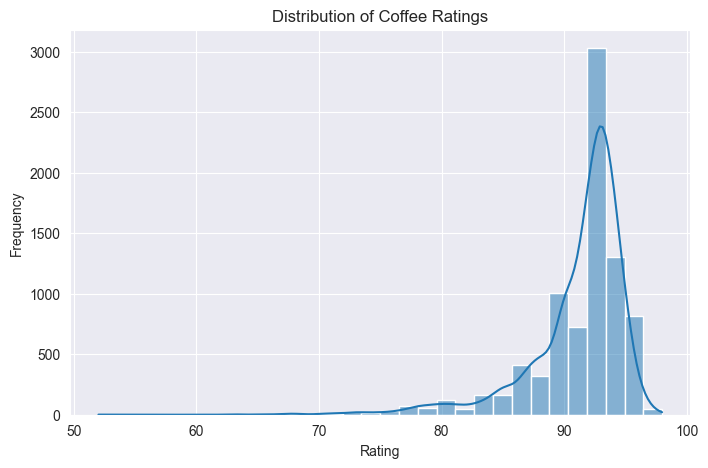

In [7]:
# Histogram of Rating
plt.figure(figsize=(8, 5))
sns.histplot(subset_df['Rating'], bins=30, kde=True)  # kde=True adds a density curve
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Coffee Ratings")
plt.show()


Very right skewed, but relatively normally distributed between 85 - 95

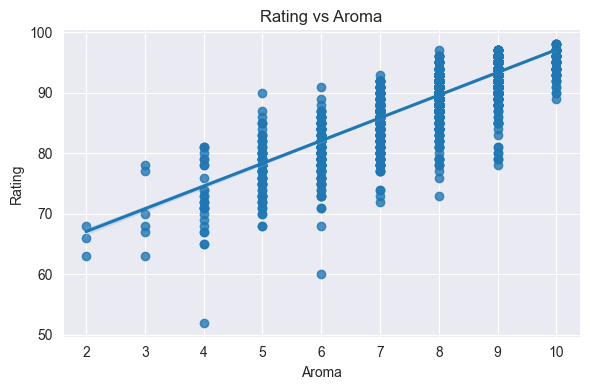

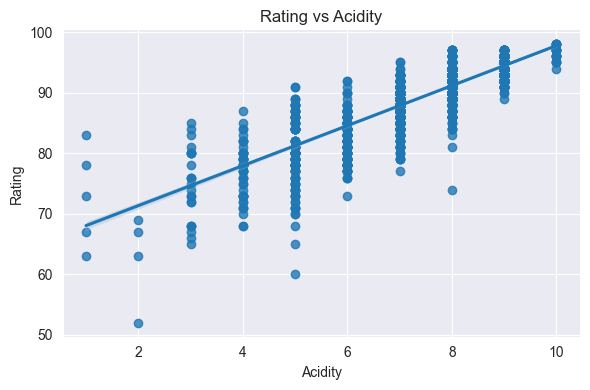

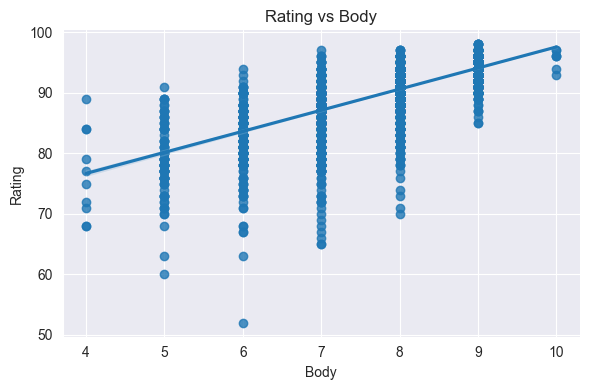

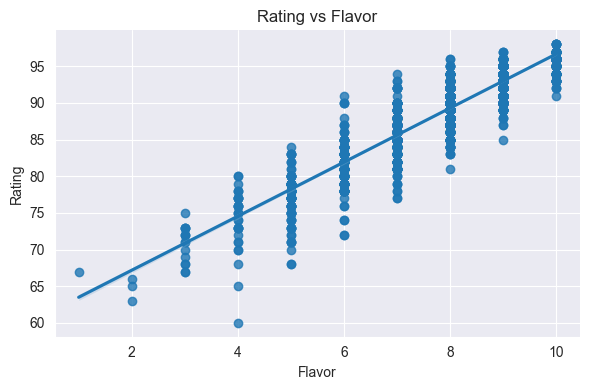

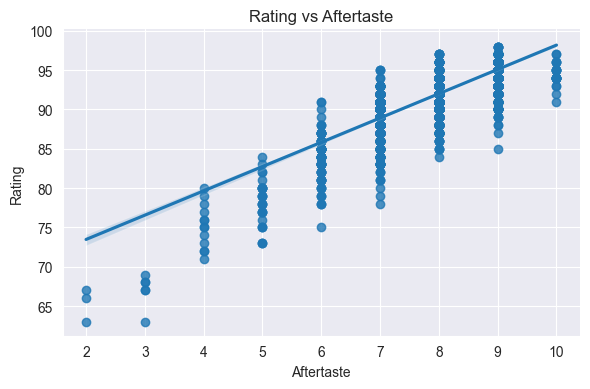

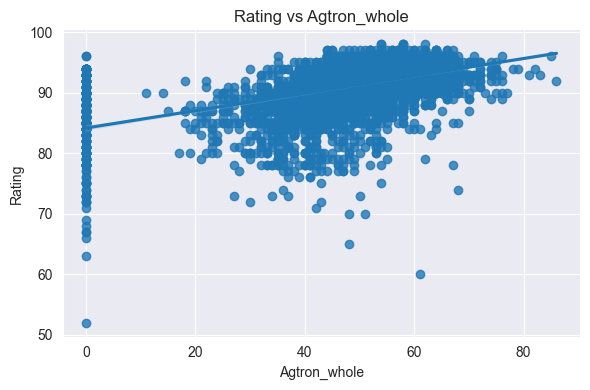

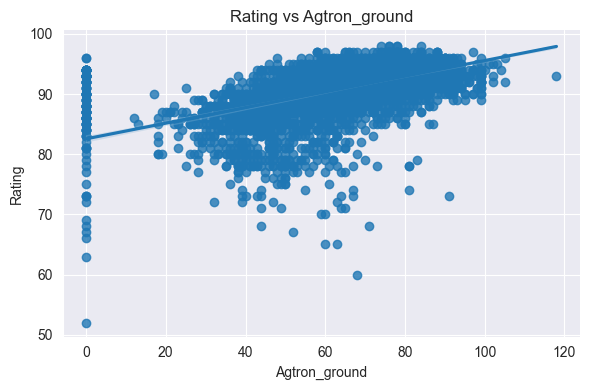

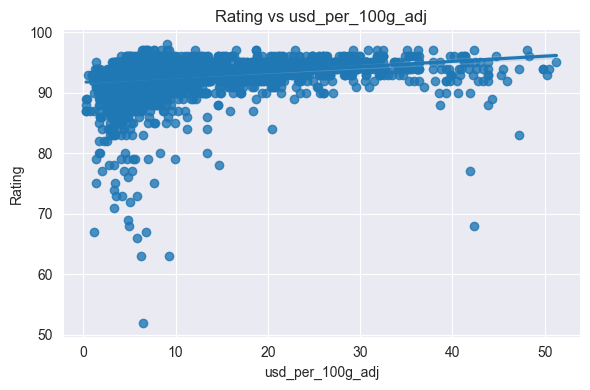

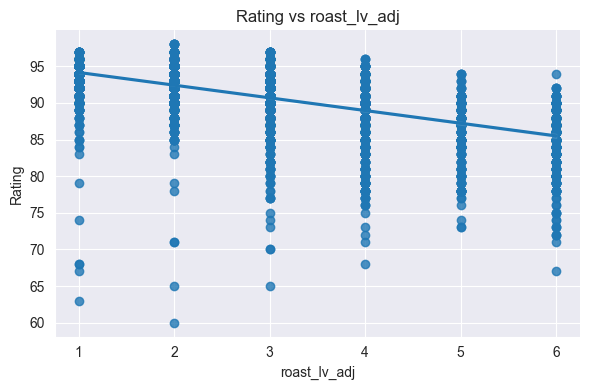

In [8]:
# Scatterplots between y variable and other features

for col in subset_df.columns:
    if col != 'Rating':
        sns.lmplot(data=subset_df, x=col, y='Rating', height=4, aspect=1.5)
        plt.title(f'Rating vs {col}')
        plt.tight_layout()
        plt.show()


- Strong positive predictors: Aroma, Acidity, Body, Flavor,Aftertaste
- Moderately strong positive predictors: Agtron_whole, Agtron_ground
- Weak positive predictor: usd_per_100g_adj
- Moderately negative predictor: roast_lv_adj

We will perform drop all the NaNs for these features + our y variable (Rating)

In [9]:
# Check size before data cleaning
print("Before data cleaning:", subset_df.shape[0])  # number of rows before

# drop nan values in our dataset
df_clean = subset_df.dropna()
# Check size before data cleaning
print("After data cleaning:", df_clean.shape[0])  # number of rows before

Before data cleaning: 8387
After data cleaning: 4942


## Model Building
- Use correlation map
- Build baseline model
- Use grid-search and stepwise modeling to find best model

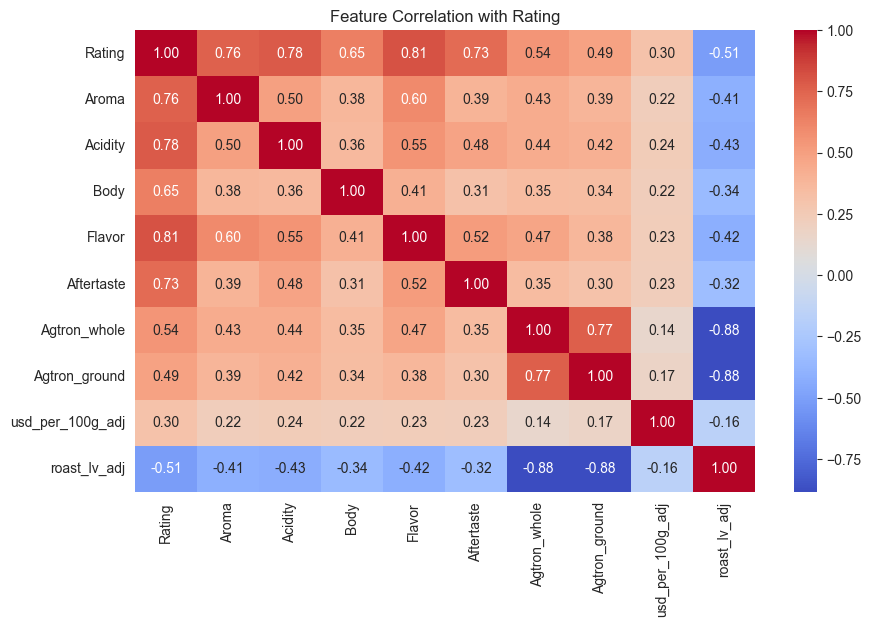

Features with a 0.5 correlation: ['Aroma', 'Acidity', 'Body', 'Flavor', 'Aftertaste', 'Agtron_whole', 'roast_lv_adj']


In [10]:
import statsmodels.api as sm
from sklearn.feature_selection import f_regression

# Use correlation heatmap

# Compute correlation matrix
corr_matrix = df_clean.corr()


# Visualize with a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Rating")
plt.show()

# Select features highly correlated with Rating (absolute value > 0.5)
selected_features = corr_matrix["Rating"][abs(corr_matrix["Rating"]) > 0.5].index.tolist()
selected_features.remove("Rating")  # Remove target variable
print("Features with a 0.5 correlation:", selected_features)

In [11]:
# Define features and target
X = df_clean.drop(columns=["Rating"])  # Drop target variable
y = df_clean["Rating"]

# Compute F-statistics and p-values
f_stat, p_values = f_regression(X, y)

# Create a DataFrame to display results
feature_significance = pd.DataFrame({"Feature": X.columns, "F-Stat": f_stat, "p-value": p_values})
feature_significance.sort_values("p-value", ascending=True, inplace=True)

print(feature_significance)

            Feature       F-Stat        p-value
0             Aroma  6670.979930   0.000000e+00
1           Acidity  7851.622055   0.000000e+00
2              Body  3536.170503   0.000000e+00
3            Flavor  9744.866899   0.000000e+00
4        Aftertaste  5536.095538   0.000000e+00
5      Agtron_whole  2078.844497   0.000000e+00
8      roast_lv_adj  1747.257389   0.000000e+00
6     Agtron_ground  1519.659986  4.536360e-290
7  usd_per_100g_adj   501.502819  7.110488e-106


In [12]:
# Check for collinearity
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv
import numpy as np

# Standardize features (VIF requires standardized values)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute VIF for each feature
vif = np.diag(inv(np.corrcoef(X_scaled, rowvar=False)))

# Create a DataFrame with VIF scores
vif_df = pd.DataFrame({"Feature": X.columns, "VIF": vif})
vif_df.sort_values("VIF", ascending=False, inplace=True)

print(vif_df)

            Feature       VIF
8      roast_lv_adj  8.406053
5      Agtron_whole  4.942971
6     Agtron_ground  4.590360
3            Flavor  2.090423
0             Aroma  1.748486
1           Acidity  1.740292
4        Aftertaste  1.503672
2              Body  1.325808
7  usd_per_100g_adj  1.110547


- Roast_lv_adj, Agtron_whole, and Agtron_ground shows signs of collinearity (if VIF is above 5, it indicates existence of collinearity)
- This makes sense because roast level and Agtron are both describing the level of roast for a coffee. Therefore, we most likely would only need one of the 3 features. 

In [13]:
# Check for variable explainability on their own
import statsmodels.api as sm

r2_scores = {}

for col in X.columns:
    X_single = sm.add_constant(X[[col]])
    model = sm.OLS(y, X_single).fit()
    r2_scores[col] = model.rsquared

# Convert to DataFrame and sort by R²
r2_df = pd.DataFrame.from_dict(r2_scores, orient='index', columns=['R_squared'])
r2_df = r2_df.sort_values(by='R_squared', ascending=False)

print(r2_df)


                  R_squared
Flavor             0.663599
Acidity            0.613810
Aroma              0.574541
Aftertaste         0.528450
Body               0.417190
Agtron_whole       0.296180
roast_lv_adj       0.261282
Agtron_ground      0.235254
usd_per_100g_adj   0.092163


- They are all statistically significant, but the feature with the highest F-Stat and R_squared is Flavor.
- Will use Flavor as baseline model

In [14]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant (intercept) to X_train and X_test
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)



In [15]:
# Build a baseline linear model using Flavor
from sklearn.metrics import r2_score, mean_squared_error
X_single_train = sm.add_constant(X_train[['Flavor']])  # adds intercept term
X_single_test = sm.add_constant(X_test[['Flavor']])  # adds intercept term

model = sm.OLS(y_train, X_single_train).fit()
print(model.summary())

# Step 5: Predict on test set
y_pred = model.predict(X_single_test)

# Step 6: Evaluate
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     7837.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:55:41   Log-Likelihood:                -6479.7
No. Observations:                3953   AIC:                         1.296e+04
Df Residuals:                    3951   BIC:                         1.298e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.3516      0.331    191.453      0.0

C:\Users\jay00\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Baseline Model with Flavor has a R^2 of 0.66 and is statistically significant. The RMSE for the baseline model is 1.26

In [16]:
# Step-wise model selection

def forward_stepwise(X, y, threshold_in=0.05, verbose=True):
    included = []
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pvals = pd.Series(index=excluded, dtype=float)

        for new_col in excluded:
            X_subset = sm.add_constant(X[included + [new_col]])
            X_subset, y_aligned = X_subset.align(y, join='inner', axis=0)
            model = sm.OLS(y_aligned, X_subset).fit()
            new_pvals[new_col] = model.pvalues[new_col]
        
        best_pval = new_pvals.min()
        if best_pval < threshold_in:
            best_feature = new_pvals.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Adding: {best_feature} (p={best_pval:.4f})')
        
        if not changed:
            break
            
    return included

selected_features = forward_stepwise(X_train, y_train)
print("\nSelected features:", selected_features)

# Final model:
X_final_train = sm.add_constant(X_train[selected_features])
X_final_test = sm.add_constant(X_test[selected_features])
final_model = sm.OLS(y_train, X_final_train).fit()
print(final_model.summary())

# Predict on test set
y_pred_final = final_model.predict(X_final_test)

# Evaluate
print("R²:", r2_score(y_test, y_pred_final))
print("RMSE:", mean_squared_error(y_test, y_pred_final, squared=False))

Adding: Acidity (p=0.0000)
Adding: Aroma (p=0.0000)
Adding: Aftertaste (p=0.0000)
Adding: Flavor (p=0.0000)
Adding: Body (p=0.0000)

Selected features: ['Acidity', 'Aroma', 'Aftertaste', 'Flavor', 'Body']
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.074e+05
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:55:42   Log-Likelihood:                 1084.5
No. Observations:                3953   AIC:                            -2157.
Df Residuals:                    3947   BIC:                            -2119.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
     

C:\Users\jay00\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- Through stepwise selection, we achieved finding a model with an R^2 of 0.993 with a p-value with all the variables significant
- The 5 features used in the final model are Body, Aftertaste, Aroma, Acidity, and Flavor
- The RMSE is 0.158, which is much lower than the baseline model. Therefore, the final model we will use would be this one. 

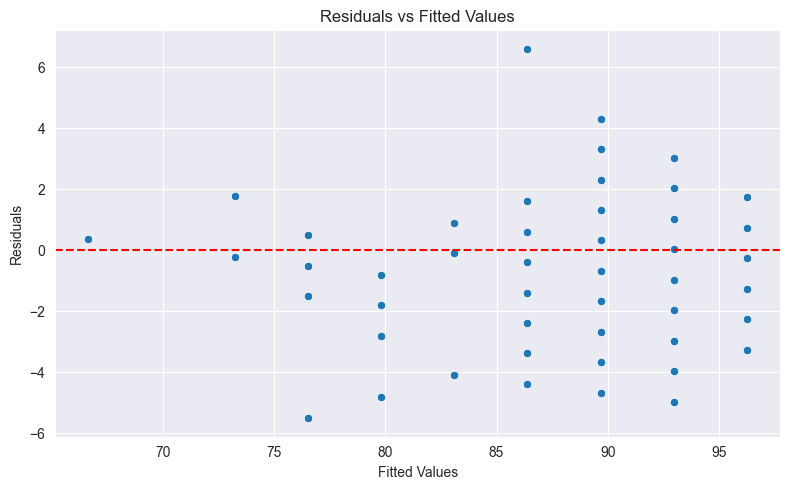

In [17]:
# Visualize baseline model residuals
residuals = model.resid
fitted_vals = model.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.tight_layout()
plt.show()


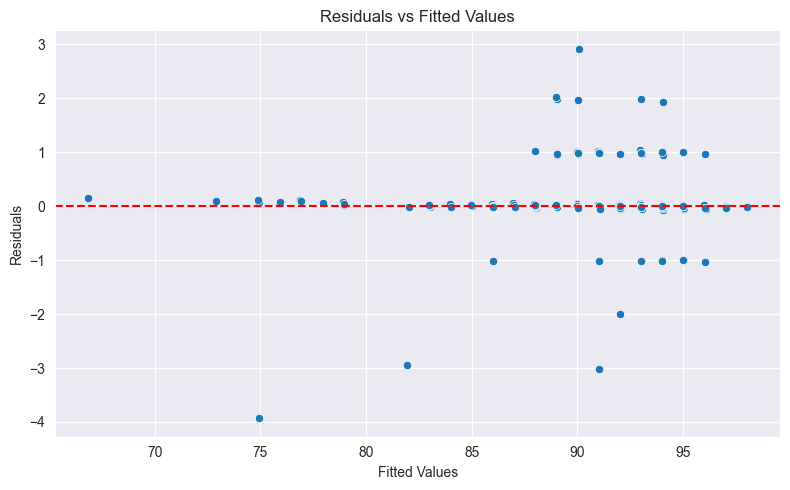

In [18]:
# Visualize final model residuals

residuals_final = final_model.resid
fitted_vals_final = final_model.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_vals_final, y=residuals_final)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.tight_layout()
plt.show()
